In [1]:
import pandas as pd
# 용량이 크니 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_oct = pd.read_csv("./drive/MyDrive/BDA(ML)/수)BDA_추천알고리즘/과제/dataset/2019-Oct.csv")
df_nov = pd.read_csv("./drive/MyDrive/BDA(ML)/수)BDA_추천알고리즘/과제/dataset/2019-Nov.csv")
df_dec = pd.read_csv("./drive/MyDrive/BDA(ML)/수)BDA_추천알고리즘/과제/dataset/2019-Dec.csv")

In [7]:
df_nov

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46 UTC,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47 UTC,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47 UTC,view,5867785,1487580007835370453,NaN,kims,31.10,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57 UTC,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


# 필수과제 1.4
- 베스트 제품의 이벤트별 달라지는가? -> 월별에 따른 이벤트별 베스트 제품이 달라지는가? 인사이트 정리



In [3]:
def get_best_products(df, month_name):
    # 이벤트별로 제품 ID의 빈도수 집계
    best_products = df.groupby(['event_type', 'product_id']).size().reset_index(name='count')

    # 각 이벤트별로 가장 많이 발생한 제품 찾기
    best_products = best_products.loc[best_products.groupby('event_type')['count'].idxmax()]
    best_products['month'] = month_name  # 월 정보 추가

    return best_products

In [4]:
# 각 월별 베스트 제품 분석
oct_best_products = get_best_products(df_oct, 'October')
nov_best_products = get_best_products(df_nov, 'November')
dec_best_products = get_best_products(df_dec, 'December')

# 결과 병합
all_best_products = pd.concat([oct_best_products, nov_best_products, dec_best_products])

# 결과 출력
print(all_best_products)


              event_type  product_id  count     month
5167                cart     5700037   4998   October
55000           purchase     5854897    700   October
67135   remove_from_cart     5700037   1412   October
134722              view     5892179   9013   October
13685               cart     5809910   7467  November
47569           purchase     5809910   2138  November
78681   remove_from_cart     5809910   2961  November
117518              view     5809910  18814  November
13271               cart     5809910   6513  December
46994           purchase     5809910   1659  December
76181   remove_from_cart     5809910   2634  December
114835              view     5809910  24419  December


# 시각화
- 5809910 제품 인기가 좋다

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

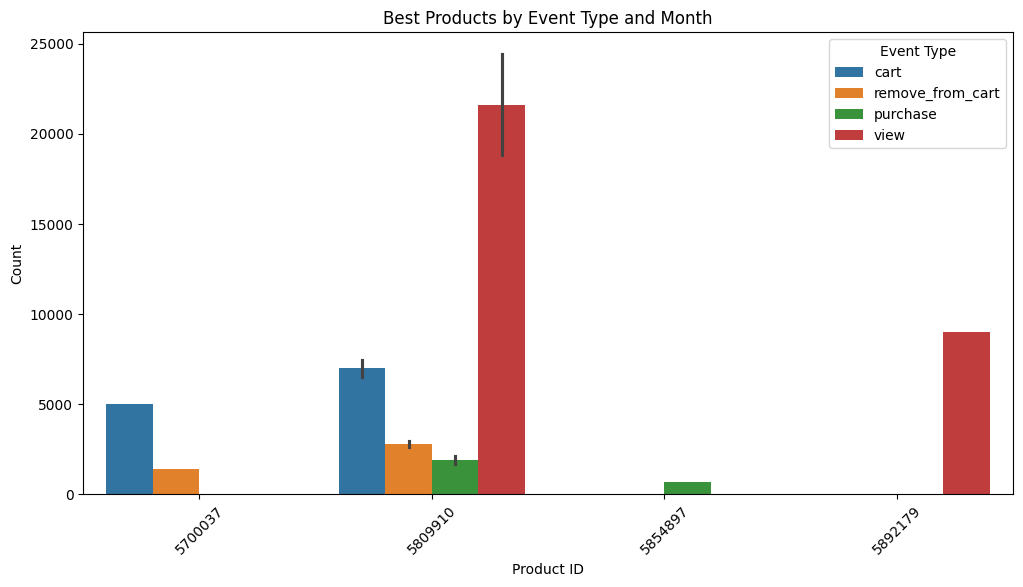

In [6]:
# 베스트 제품 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=all_best_products, x='product_id', y='count', hue='event_type')
plt.title('Best Products by Event Type and Month')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.show()

# 월별 분류

In [8]:
def get_best_products_by_month(df, month_name):
    # 제품별 이벤트 수 집계 (view, cart, purchase 등)
    product_counts = df.groupby('product_id').size().reset_index(name='count')

    # 가장 많이 발생한 제품 찾기
    best_product = product_counts.loc[product_counts['count'].idxmax()]
    best_product['month'] = month_name  # 월 정보 추가

    return best_product

# 각 월별 베스트 제품 분석
oct_best_product = get_best_products_by_month(df_oct, 'October')
nov_best_product = get_best_products_by_month(df_nov, 'November')
dec_best_product = get_best_products_by_month(df_dec, 'December')

# 결과 병합
monthly_best_products = pd.DataFrame([oct_best_product, nov_best_product, dec_best_product])

# 결과 출력
print(monthly_best_products)

<ipython-input-8-1babbb88351e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_product['month'] = month_name  # 월 정보 추가
<ipython-input-8-1babbb88351e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_product['month'] = month_name  # 월 정보 추가
<ipython-input-8-1babbb88351e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_product['month'] = month_name  # 월 정보 추가
<ipython-input-8-1babbb88351e>:7: SettingWithCopyWarning: 
A 

       product_id  count     month
18558     5809910  10523   October
18143     5809910  31380  November
17703     5809910  35225  December


<ipython-input-8-1babbb88351e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_product['month'] = month_name  # 월 정보 추가
<ipython-input-8-1babbb88351e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_product['month'] = month_name  # 월 정보 추가


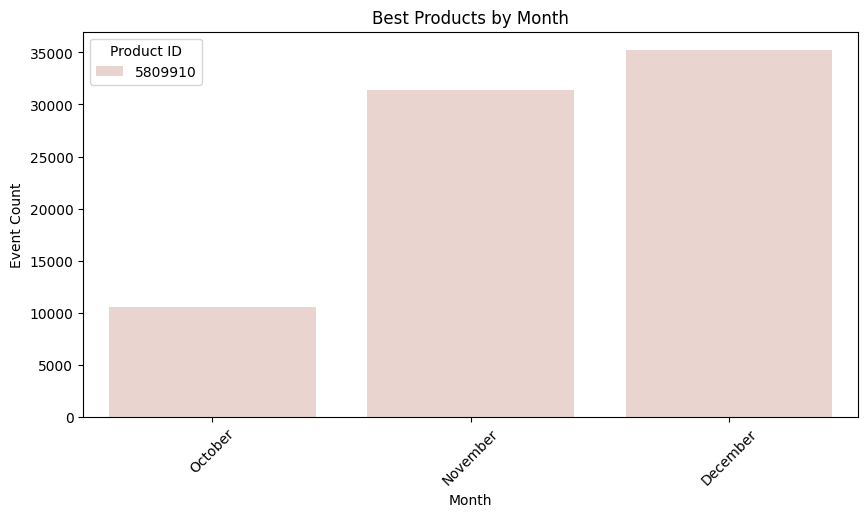

In [9]:
# 베스트 제품 시각화 _ 12월이 제일 많이 팔림
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_best_products, x='month', y='count', hue='product_id')
plt.title('Best Products by Month')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.legend(title='Product ID')
plt.show()